In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
hemisphere_4_points = pd.DataFrame(
                        {
                            "y-force": [10, 8, 7.5, 6.5, 6, 5, 3],
                            "0.01": [np.NaN, np.NaN, 1, np.NaN, np.NaN, 1, np.NaN],
                            "0.0075": [np.NaN, np.NaN, 0.5, np.NaN, np.NaN, np.NaN, np.NaN],
                            "0.005": [np.NaN, np.NaN, 0, 1, 1, 1, np.NaN],
                            "0.0025": [np.NaN, np.NaN, 0, 0, 0, np.NaN, 1],
                            "0.001": [0, 0, np.NaN, 0, np.NaN, np.NaN, 0.5]
                        }
)

hemisphere_4n_points = pd.DataFrame(
                        {
                            "y-force": [4, 3, 2, 1.5, 1, 1.25, 1.75, 2.25, 2.75, 3.5, 5],
                            "0.005": [1, 0.25, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                            "0.0025": [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                            "0.001": [0, 0, 0.25, 0.5, 1, 1, 1, 1, 1, 1, 1],
                        }
)

hemisphere_3_points = pd.DataFrame(
                        {
                            "y-force": [4, 3, 2.75, 2.5, 2.25, 2, 1.9, 1.75, 1.5, 1, 0.75],
                            "0.005": [0, 0, 1, 1, 1, 0.25, 1, 1, 1, 1, 1],
                            "0.0025": [0, 0, 1, 1, 1, 0, 1, 1, 0.75, 1, 1],
                            "0.001": [0, 0, 0, 0, 0.5, 0, 0.5, 0.5, 0.5, 1, 1]
                        }
)

hemisphere_6_points = pd.DataFrame(
                        {
                            "y-force": [5, 4, 3.5, 3, 2.5, 2, 1.9, 1.8, 1.75, 1.5, 1.3, 1],
                            "0.005": [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                            "0.0025": [0, 0, 0.5, 0, 1, 0, 1, 1, 1, 1, 1, 1],
                            "0.001": [0, 0, 0, 0, 0.5, 0, 0.75, 0, 1, 0.5, 0.5, 1],
                        }
)

hemisphere_12_points = pd.DataFrame(
                        {
                            "y-force": [10, 7.5, 6, 5, 3],
                            "0.01": [1, np.NaN, np.NaN, 1, np.NaN],
                            "0.005": [1, 1, 1, 0.5, 1],
                            "0.0025": [0, 0, 0.5, 0, 1],
                            "0.001": [0, 0, 0, 0, 0],
                            "0.0001": [np.NaN, np.NaN, np.NaN, 0, np.NaN]
                        }
)

hemisphere_20_points = pd.DataFrame(
                        {
                            "y-force": [15, 10, 7.5, 6, 5, 4.5, 4, 3, 1.5],
                            "0.005": [0, 0.5, 1, 1, 0, 1, 1, 1, 1],
                            "0.0025": [0, 0, 0, 0, 0, 1, 1, 1, 1],
                            "0.001": [0, 0, 0, 0, 0, 0, 0, 1, 1],
                        }
)

bridging_lengths_cm = {"4": 24.4, "4n": 24, "3": 13, "6": 12.4, "12": 4.9, "20": 3}
speeds = ["0.005", "0.0025", "0.001"]

# define constants
A       = 0.3 * 0.1 # area in m^2
G       = 90*10**(6) # Shear modulus in Pa
G_sd    = 15*10**(6) # Shear modulus error in Pa
d_c     = 5*10**(-6) # critical slip distance in m
u       = 0.06 # stress drop magnitude in friction coefficient
y_force = 10*1000 # load in N
L_c     = 0.058 # critical nucleation length in m
C       = 4/(3 * np.pi) # shape constant

# define the length scale as a function of the normal load
def length_scale(load, G, C):
    # print(f'Normal stress: {load / A / 10**6} Pa')
    L = (C * G * d_c) / ((load / A) * u) * 100
    return L

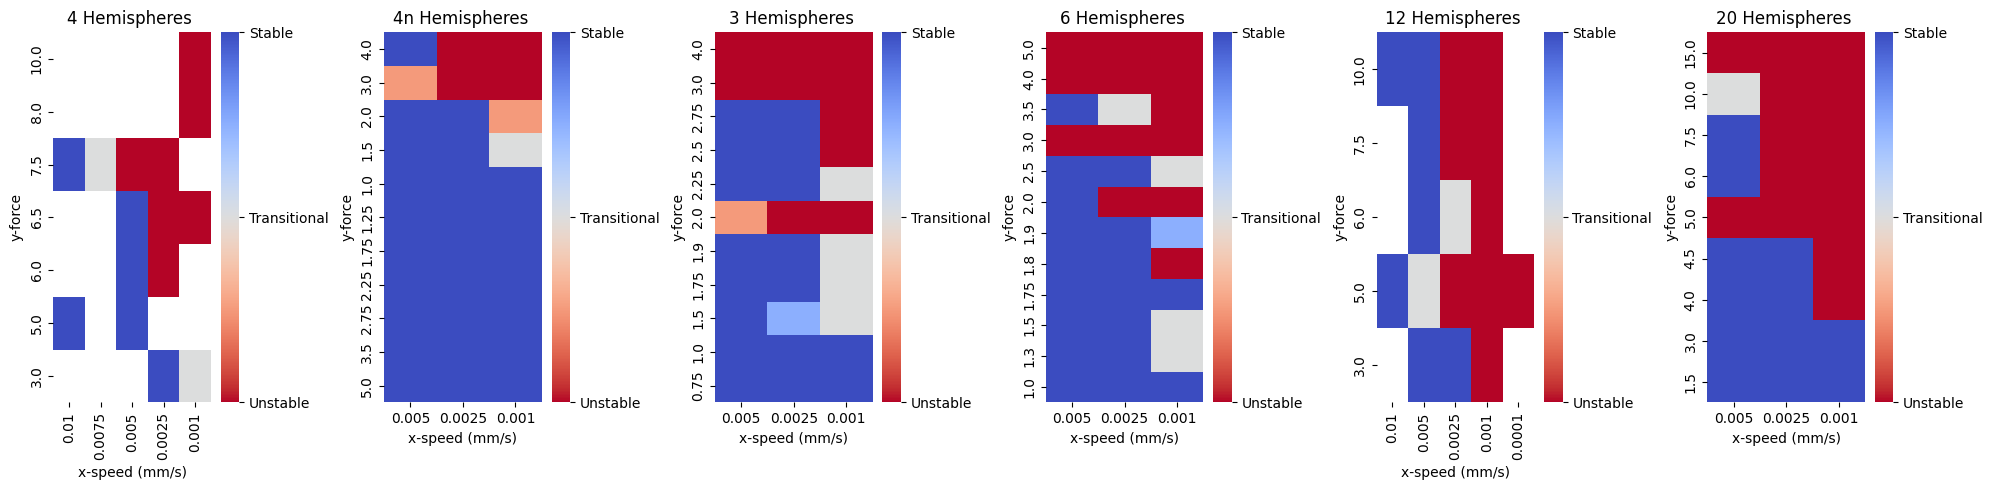

In [4]:
## Plotting stability map for each block, side by side
## Plot the y-force on the y-axis, and the x-speed (columns) on the x-axis
## Color code points based on the value
point_names = [4, "4n", 3, 6, 12, 20]
import seaborn as sns

fig, axs = plt.subplots(1, 6, figsize=(20, 5))

for i, (points, ax) in enumerate(zip([hemisphere_4_points, hemisphere_4n_points, hemisphere_3_points, hemisphere_6_points, hemisphere_12_points, hemisphere_20_points], axs)):
    sns.heatmap(points.set_index('y-force'), cmap='coolwarm_r', ax=ax, cbar=True)

    # make custom colorbar
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels(['Unstable', 'Transitional', 'Stable'])
    
    ax.set_title(f'{point_names[i]} Hemispheres ')
    ax.set_xlabel('x-speed (mm/s)')
    # ax.set_ylim(0, 10)

plt.tight_layout()
plt.show()

C:\Users\lekim\AppData\Local\Temp\ipykernel_22744\3695936181.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  L = (C * G * d_c) / ((load / A) * u) * 100
C:\Users\lekim\AppData\Local\Temp\ipykernel_22744\1047146779.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


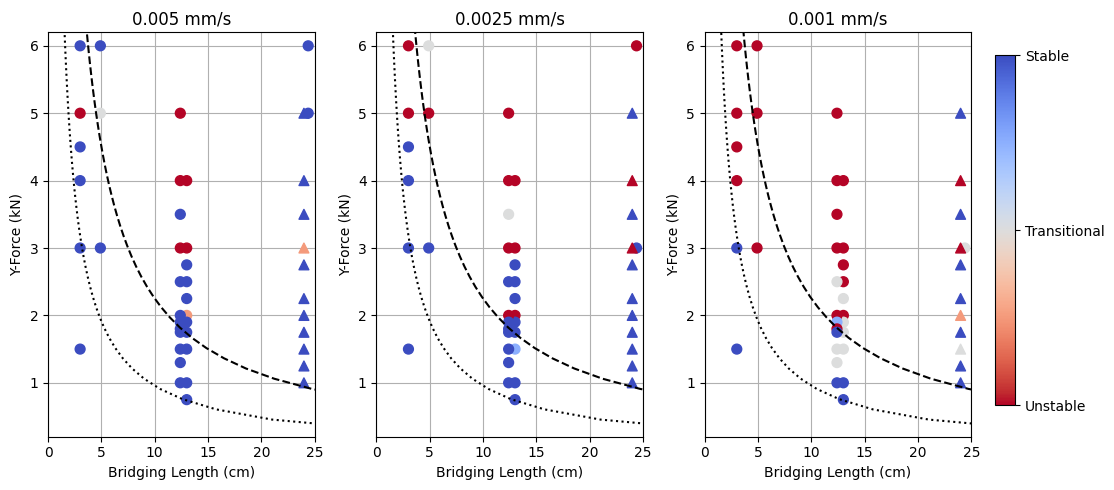

In [12]:
## Plotting bridging length and stability
## Plot the y-force on the y-axis, and the bridging length on the x-axis
## Scatter data from each block on the same plot
## Make one plot for 0.005, 0.0025, 0.001 mm/s

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# axs[0], 0.005 mm/s
# plot the y-force on the y-axis, and the bridging length on the x-axis
# scatter data from each block, from column "0.005"

for i, (speed, ax) in enumerate(zip(speeds, axs)):
    # iterate over each block
    for block, points in zip(bridging_lengths_cm, [hemisphere_4_points, hemisphere_4n_points, hemisphere_3_points, hemisphere_6_points, hemisphere_12_points, hemisphere_20_points]):
        # plot the y-force on the y-axis, and the bridging length on the x-axis
        # color code the points based on the value
        if block == "4n":
            ax.scatter(bridging_lengths_cm[block]*np.ones(len(points)), points['y-force'], c=points[speed], cmap='coolwarm_r', s=50, vmin=0, vmax=1, marker='^')
        else:
            ax.scatter(bridging_lengths_cm[block]*np.ones(len(points)), points['y-force'], c=points[speed], cmap='coolwarm_r', s=50, vmin=0, vmax=1)

    # plot predicted L_c for different y-forces
    y_forces = np.linspace(0, 15, 100)
    ax.plot([length_scale(y_force*1000, G=G, C=1) for y_force in y_forces], y_forces, color='black', linestyle='--', label='C=1')
    ax.plot([length_scale(y_force*1000, G=G, C=C) for y_force in y_forces], y_forces, color='black', linestyle=':', label='C=4/3π')


    ax.set_title(f'{speed} mm/s')
    ax.set_xlabel('Bridging Length (cm)')
    ax.set_ylabel('Y-Force (kN)')
    # ax.set_xscale('log')
    ax.set_xlim(0, 25)
    ax.set_ylim(0.2, 6.2)
    ax.grid(True)
    ax.set_axisbelow(True)

fig.subplots_adjust(right=5)
cbar_ax = fig.add_axes([1, 0.18, 0.02, 0.7])
cbar = fig.colorbar(ax.collections[0], cax=cbar_ax, ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(['Unstable', 'Transitional', 'Stable'])


# plt.legend()
plt.tight_layout()
plt.show()